FORECASTING MONTHLY BEER PRODUCTION USING HYBRID METHOD- ARIMA & PROPHET

In [ ]:
!pip install pandas numpy matplotlib statsmodels prophet plotly

In [90]:
#Step 1 - importing dependencies
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.io as pio
from prophet import Prophet
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from datetime import datetime, timedelta

In [2]:
warnings.filterwarnings('ignore')

In [3]:
#pio.renderers.default = 'iframe'

In [101]:
#Step 2 - loading the data and creating a df
df = pd.read_csv('monthly-beer-production-in-austr.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace= True)


In [5]:
df.head(2)

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 476 entries, 1956-01-01 to 1995-08-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Monthly beer production  476 non-null    float64
dtypes: float64(1)
memory usage: 7.4 KB


But we only want the year and month as the df shows production of beer in a month not at the start. So we set the frequency to monthly.

In [6]:
df.index.freq = 'MS'

In [83]:
df.head(2)

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 476 entries, 1956-01-01 to 1995-08-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Monthly beer production  476 non-null    float64
dtypes: float64(1)
memory usage: 7.4 KB


We are using prophet model to forecast the beer production. So, first we create a copy of original dataframe 'df' and rename the columns.

In [8]:
train_size = int(len(df)*0.75)
train_data = df[:train_size]
test_data = df[train_size:]
train_data

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9
...,...
1985-05-01,144.7
1985-06-01,123.6
1985-07-01,151.6


In [9]:
#Step 3 - creating a copy df, resetting the index and renaming the columns as required for prophet
df_pr = df.copy()
df_pr = df.reset_index()
df_pr.columns = ['ds', 'y']
df_pr.head(2)

,ds,y
0,1956-01-01,93.2
1,1956-02-01,96.0


<Axes: xlabel='ds'>

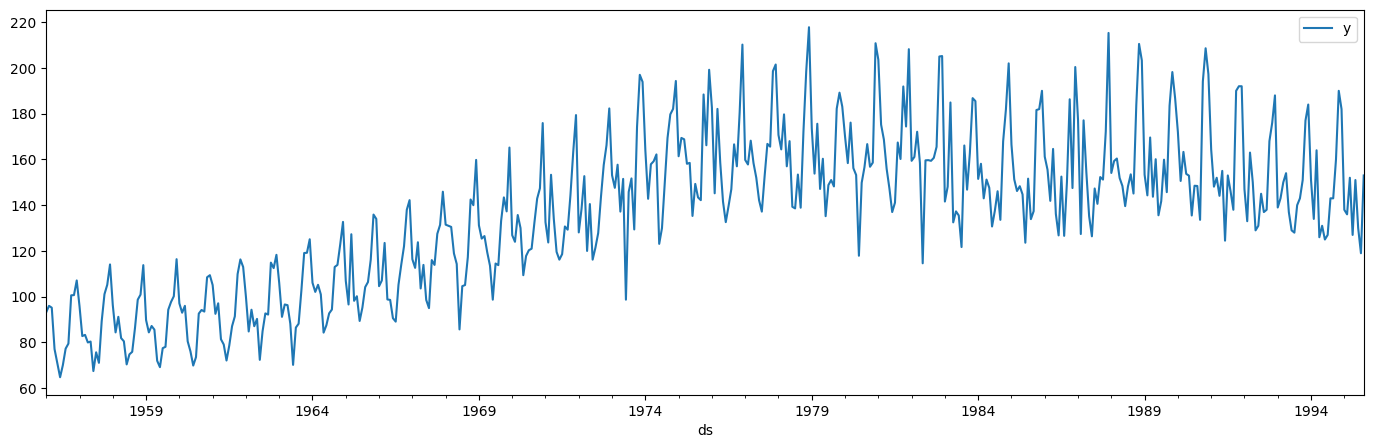

In [10]:
#visualising the df_pr
df_pr.plot(x = 'ds', y = 'y', figsize= (17,5))

We can clearly see that the data isn't stationary and contains seasonality.

In [11]:

#Step 4 - spliting the data into training and testing datasets.
train_size = int(len(df_pr)*0.75)
train_data_pr = df_pr[:train_size]
test_data_pr = df_pr[train_size:]


In [12]:

#Step 5 - Creating a prophet model
pr_model = Prophet()
pr_model.fit(train_data_pr)
future = pr_model.make_future_dataframe(periods = (int(len(test_data_pr))), freq = 'MS')
pr_predictions = pr_model.predict(future)


18:23:47 - cmdstanpy - INFO - Chain [1] start processing
18:23:47 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
pr_predictions.head(2)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1956-01-01,82.861139,74.501620,97.792700,82.861139,82.861139,2.749778,2.749778,2.749778,2.749778,2.749778,2.749778,0.0,0.0,0.0,85.610917
1,1956-02-01,83.025825,69.664726,92.168178,83.025825,83.025825,-1.722375,-1.722375,-1.722375,-1.722375,-1.722375,-1.722375,0.0,0.0,0.0,81.303449


In [91]:
pr_predictions.tail(2)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
474,1995-07-01,139.401653,105.445806,138.088921,128.209287,151.164232,-18.287757,-18.287757,-18.287757,-18.287757,-18.287757,-18.287757,0.0,0.0,0.0,121.113896
475,1995-08-01,139.268036,115.014910,147.497339,127.847305,151.101940,-8.228281,-8.228281,-8.228281,-8.228281,-8.228281,-8.228281,0.0,0.0,0.0,131.039755


In [14]:
pr_predictions['ds']

0     1956-01-01
1     1956-02-01
2     1956-03-01
3     1956-04-01
4     1956-05-01
         ...    
471   1995-04-01
472   1995-05-01
473   1995-06-01
474   1995-07-01
475   1995-08-01
Name: ds, Length: 476, dtype: datetime64[ns]

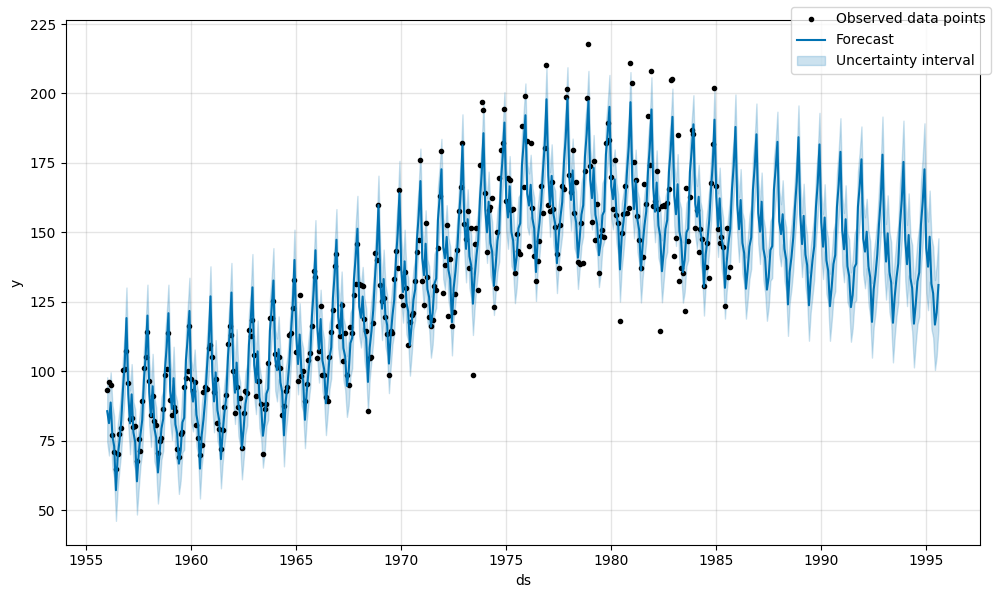

In [15]:
fig = pr_model.plot(pr_predictions)
fig.legend

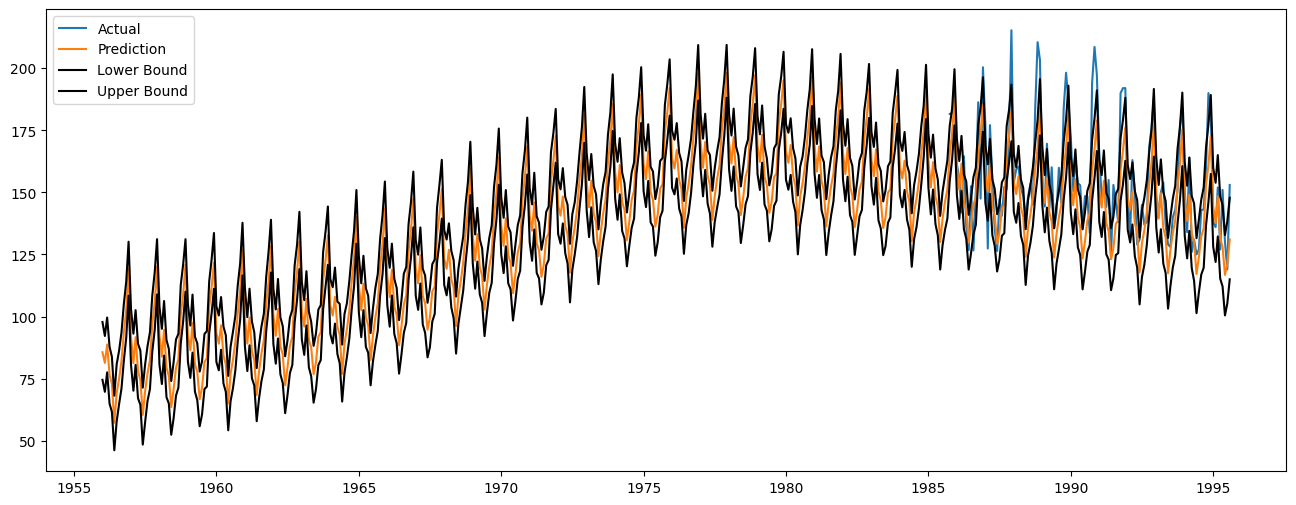

In [16]:
# Let's see how accurate that is
plt.figure(figsize=(16, 6))
plt.plot(test_data_pr.ds, test_data_pr.y, label='Actual')
plt.plot(pr_predictions.ds, pr_predictions.yhat, label='Prediction')
plt.plot(pr_predictions.ds, pr_predictions.yhat_lower, c='k', label='Lower Bound')
plt.plot(pr_predictions.ds, pr_predictions.yhat_upper, c='k', label='Upper Bound')
plt.legend()
plt.show()

In [17]:
pr_predictions1 = pd.DataFrame({"Date" : pr_predictions[-len(test_data_pr):]['ds'], 
                               "Pred" : pr_predictions[-len(test_data_pr):]["yhat"]})

In [19]:
pr_predictions1.head(2)

,Date,Pred
357,1985-10-01,165.442734
358,1985-11-01,174.112795


In [20]:
pr_predictions1= pr_predictions1.set_index('Date')

In [22]:
pr_predictions1.head(2)

,Pred
Date,
1985-10-01,165.442734
1985-11-01,174.112795


In [23]:
pr_predictions1.index.freq = 'MS'

In [24]:
test_data["Prophet_Predictions"] = pr_predictions1['Pred'].values

In [25]:
test_data.tail(2)

,Monthly beer production,Prophet_Predictions
Month,,
1995-07-01,119.0,121.113896
1995-08-01,153.0,131.039755


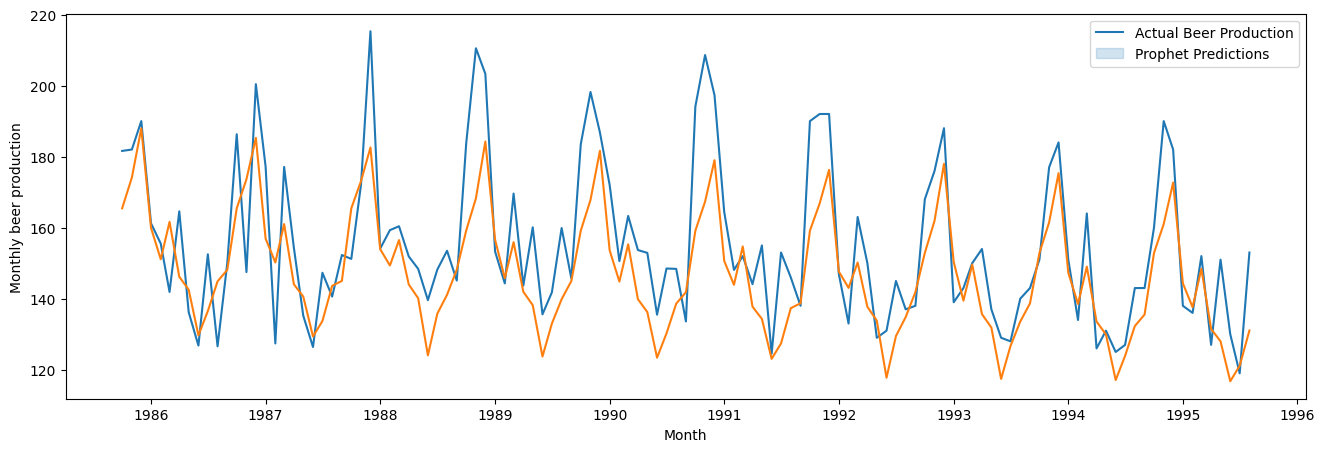

In [55]:
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["Monthly beer production"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);
plt.legend(["Actual Beer Production", "Prophet Predictions"])
plt.show()

In [27]:
#Step - Calucluate residual
prophet_residuals = df_pr['y'][:train_size] - pr_predictions['yhat'][:train_size]
prophet_residuals

0       7.589083
1      14.696551
2       6.467894
3       0.547456
4      -2.054934
         ...    
352     0.225980
353    -6.421727
354    12.300193
355   -12.253772
356   -13.880541
Length: 357, dtype: float64

In [30]:
prophet_residuals.info()

<class 'pandas.core.series.Series'>
RangeIndex: 357 entries, 0 to 356
Series name: None
Non-Null Count  Dtype  
--------------  -----  
357 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [97]:
#Step 6 - Apply ARIMA to model and forecast the residuals
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(prophet_residuals, order=(1, 0, 1))
arima_model_fit = arima_model.fit()
arima_forecast = arima_model_fit.predict(start=0, end=train_size-1)

In [98]:
arima_forecast

0      0.001419
1     -0.545728
2     -1.367526
3     -1.165511
4     -0.619501
         ...   
352    0.520637
353    0.242420
354    0.606312
355   -0.627011
356    0.614863
Name: predicted_mean, Length: 357, dtype: float64

In [43]:
#Step 7 -  Combine forecasts
combined_forecast = pr_predictions['yhat'][:train_size] + arima_forecast

In [44]:
combined_forecast.info()

<class 'pandas.core.series.Series'>
RangeIndex: 357 entries, 0 to 356
Series name: None
Non-Null Count  Dtype  
--------------  -----  
357 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [87]:
prophet_model_final = Prophet()
prophet_model_final.fit(train_data_pr)  # Fit the model on the training data

future_final = prophet_model_final.make_future_dataframe(periods=len(test_data_pr))
prophet_predictions_final = prophet_model_final.predict(future_final)

arima_model_final = ARIMA(prophet_residuals, order=(1, 0, 1))
arima_model_final_fit = arima_model_final.fit()
arima_forecast_final = arima_model_final_fit.predict(start=0, end=len(train_data_pr) + len(test_data_pr) - 1)

combined_forecast_final = prophet_predictions_final['yhat'] + arima_forecast_final

19:30:57 - cmdstanpy - INFO - Chain [1] start processing
19:30:57 - cmdstanpy - INFO - Chain [1] done processing


In [88]:
prophet_predictions_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          476 non-null    datetime64[ns]
 1   trend                       476 non-null    float64       
 2   yhat_lower                  476 non-null    float64       
 3   yhat_upper                  476 non-null    float64       
 4   trend_lower                 476 non-null    float64       
 5   trend_upper                 476 non-null    float64       
 6   additive_terms              476 non-null    float64       
 7   additive_terms_lower        476 non-null    float64       
 8   additive_terms_upper        476 non-null    float64       
 9   yearly                      476 non-null    float64       
 10  yearly_lower                476 non-null    float64       
 11  yearly_upper                476 non-null    float64       

In [61]:
arima_forecast_final.info()

<class 'pandas.core.series.Series'>
RangeIndex: 476 entries, 0 to 475
Series name: predicted_mean
Non-Null Count  Dtype  
--------------  -----  
476 non-null    float64
dtypes: float64(1)
memory usage: 3.8 KB


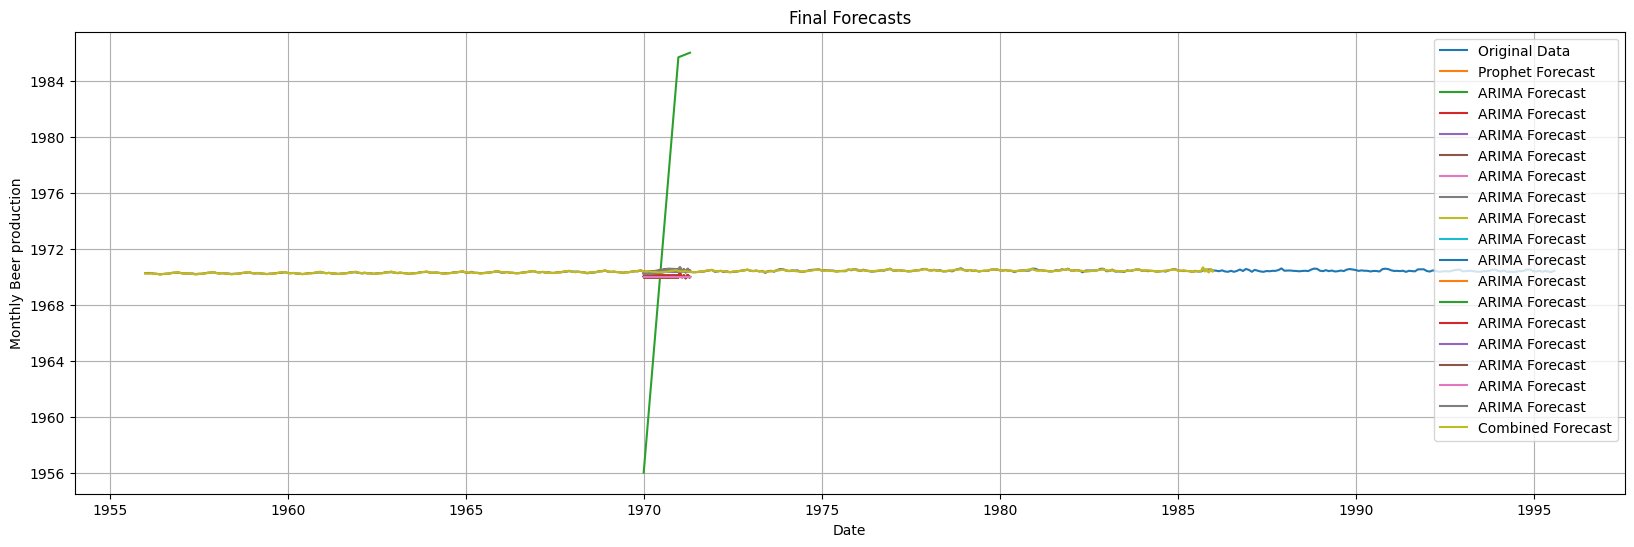

In [96]:
# Step 10: Visualize the final forecasts
plt.figure(figsize=(20, 6))

# Plot the original data
plt.plot(df_pr['ds'], df_pr['y'], label='Original Data')

# Plot the Prophet forecast
plt.plot(prophet_predictions_final['ds'], prophet_predictions_final['yhat'], label='Prophet Forecast')

# Plot the ARIMA forecast
plt.plot(arima_forecast_final.index, prophet_predictions_final.values, label='ARIMA Forecast')

# Plot the combined forecast
plt.plot(prophet_predictions_final['ds'], combined_forecast_final, label='Combined Forecast')

plt.xlabel('Date')
plt.ylabel('Monthly Beer production')
plt.title('Final Forecasts')
plt.legend()
plt.grid(True)
plt.show()